<a href="https://colab.research.google.com/github/Hemalatha2026/API/blob/main/AICTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("/content/drive/MyDrive/SPAM.csv",encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = data[['v1','v2']]

In [6]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# Assuming 'data' has 5 columns, provide 5 new column names:
data.columns = ['output', 'sms', 'col3', 'col4', 'col5']
# Replace 'col3', 'col4', 'col5' with your desired names for the other 3 columns.

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   object
 1   sms     5572 non-null   object
 2   col3    50 non-null     object
 3   col4    12 non-null     object
 4   col5    6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
data = data.rename(columns={'v1': 'message'})
data = data.rename(columns={'v2': 'class'})

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [12]:
# Instead of:
# x = data['message']
# y = data['class']

# Use the correct column names you assigned earlier:
x = data['sms']  # Assuming 'sms' contains the message text
y = data['output'] # Assuming 'output' contains the class labels (spam/ham)

In [13]:
x.shape

(5572,)

In [14]:
y.shape

(5572,)

In [15]:
data.isnull().sum()

,0
output,0
sms,0
col3,5522
col4,5560
col5,5566


In [16]:
cv=CountVectorizer()
x_transformed=cv.fit_transform(x) # Pass the 'x' variable (containing the messages) to fit_transform()
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.2)
x_train.shape

(4457, 8672)

In [17]:
x_test.shape

(1115, 8672)

In [18]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(x_test)


In [20]:
model.score(x_train,y_train)

0.9943908458604442

In [23]:
# Instead of:
# print(data['class'].value_counts())

# Use the correct column name ('output'):
print(data['output'].value_counts())

output
ham     4825
spam     747
Name: count, dtype: int64


In [26]:
print(data['sms'].isnull().sum())
print(data['sms'].head())

0
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object


In [28]:
data = data.dropna(subset=['sms'])

In [29]:
from imblearn.over_sampling import RandomOverSampler

# Assuming 'x_transformed' from previous cells is the vectorized data
X_vectorized = x_transformed

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_vectorized, y)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(x)


In [31]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_vectorized = vectorizer.fit_transform(x)


In [32]:
model = MultinomialNB(alpha=0.5)  # Try different values like 0.1, 1.0
model.fit(x_train, y_train)


MultinomialNB(alpha=0.5)

In [33]:
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))


Training Accuracy: 0.9955126766883554
Testing Accuracy: 0.9811659192825112


In [ ]:
!pip install colab_ssh --upgrade


In [34]:
import string
punc = string.punctuation

In [35]:
def removepuch(text):
    return text.translate(str.maketrans('','',punc))

In [36]:

data['sms'] = data['sms'].apply(removepuch)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
x = data['sms']
y = data['output']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
x = data['sms'] # x represents the text data
y = data['output']

vect = CountVectorizer()
x_transformed = vect.fit_transform(x)  # Transform the text data and store in x_transformed
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
x = data['sms'] # x represents the text data
y = data['output']

# Create a CountVectorizer object
vect = CountVectorizer()

# Fit and transform the text data using CountVectorizer
x_transformed = vect.fit_transform(x)

# Split the transformed data into training and testing sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_transformed,y,test_size = 0.20)

# Create and train the MultinomialNB model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain,ytrain)  # Use the transformed data (x_transformed) for training

MultinomialNB()

In [40]:

pred = model.predict(xtest)

In [41]:
print('train model',model.score(xtrain,ytrain))
print('test model',model.score(xtest,ytest))

train model 0.9923715503702042
test model 0.9748878923766816


In [42]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00


In [43]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf = TfidfVectorizer()

# Assuming 'x' contains your text data
x_tfidf = tfidf.fit_transform(x)  # Fit and transform your data

# ... (Your code to train the model using 'x_tfidf' and create the 'model' object) ...

# Save the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

In [44]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

st.title("Email/SMS Spam Classifier")

input_sms = st.text_area("Enter the message")

if st.button('Predict'):

    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

2025-01-30 08:54:59.331 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 08:54:59.678 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-30 08:54:59.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 08:54:59.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 08:54:59.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 08:54:59.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 08:54:59.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 08:54:59.704 Session state does not 

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [46]:
# Instead of:
# data['target'] = encoder.fit_transform(data['target'])

# Use the correct column name that holds the data you want to encode.
# Assuming 'output' is the column you want to encode:
data['target'] = encoder.fit_transform(data['output'])

In [47]:
data.head()

,output,sms,col3,col4,col5,target
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0


In [48]:
data.duplicated().sum()

428

In [49]:
# remove duplicates
data = data.drop_duplicates(keep='first')

EDA

In [50]:
data.head()

,output,sms,col3,col4,col5,target
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0


In [51]:
data['target'].value_counts()

,count
target,
0,4501
1,643


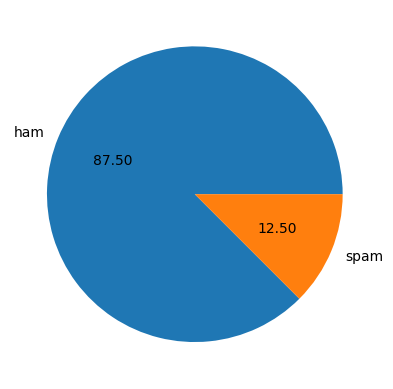

In [52]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [53]:
import nltk

In [54]:
!pip install nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
# Instead of:
# data['num_characters'] = data['message'].apply(len)

# Check if 'message' column exists. If not, try 'sms' or other potential column names.
if 'message' in data.columns:
    data['num_characters'] = data['message'].apply(len)
else:
    # Try 'sms' if 'message' is not found
    if 'sms' in data.columns:
        data['num_characters'] = data['sms'].apply(len)
        print("Using 'sms' column for character count.")
    else:
        print("Neither 'message' nor 'sms' column found. Please check your DataFrame.")

Using 'sms' column for character count.


In [57]:
data.head()

,output,sms,col3,col4,col5,target,num_characters
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0,102
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,149
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0,43
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0,59


In [58]:
# num of words
# Instead of 'text', use the correct column containing the text data, likely 'sms' or 'message'.
data['num_words'] = data['sms'].apply(lambda x: len(nltk.word_tokenize(x)))
# If the text data is in the 'message' column, change 'sms' to 'message'.

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [59]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

# num of words
# Instead of 'text', use the correct column containing the text data, likely 'sms' or 'message'.
data['num_words'] = data['sms'].apply(lambda x: len(nltk.word_tokenize(x)))
# If the text data is in the 'message' column, change 'sms' to 'message'.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [60]:
data.head()

,output,sms,col3,col4,col5,target,num_characters,num_words
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0,102,20
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0,23,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,149,28
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0,43,11
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0,59,13


In [61]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

KeyError: 'text'

In [62]:
# Instead of using 'text', use the correct column containing the text data, likely 'sms' or 'message'.
data['num_sentences'] = data['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))
# If the text data is in the 'message' column, change 'sms' to 'message'.

In [63]:
data.head()

,output,sms,col3,col4,col5,target,num_characters,num_words,num_sentences
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0,102,20,1
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0,23,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,149,28,1
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0,43,11,1
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0,59,13,1


In [64]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5144.000000,5144.000000,5144.000000
mean,74.939152,15.168935,0.999806
std,55.561147,10.849851,0.013943
min,1.000000,0.000000,0.000000
25%,33.000000,7.000000,1.000000
50%,57.000000,12.000000,1.000000
75%,111.000000,22.000000,1.000000
max,888.000000,171.000000,1.000000


In [65]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4501.000000,4501.000000,4501.000000
mean,66.772495,13.998445,0.999778
std,53.596984,10.891107,0.014905
min,1.000000,0.000000,0.000000
25%,31.000000,7.000000,1.000000
50%,50.000000,11.000000,1.000000
75%,86.000000,18.000000,1.000000
max,888.000000,171.000000,1.000000


In [66]:
#spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,643.000000,643.000000,643.0
mean,132.105754,23.362364,1.0
std,29.223033,5.896904,0.0
min,12.000000,2.000000,1.0
25%,124.000000,21.000000,1.0
50%,142.000000,25.000000,1.0
75%,151.000000,27.000000,1.0
max,208.000000,34.000000,1.0


In [67]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

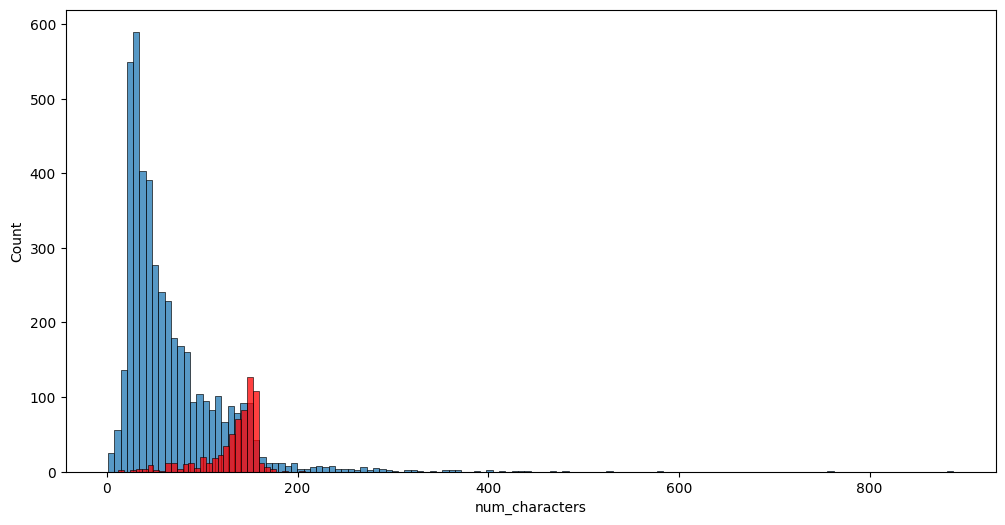

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

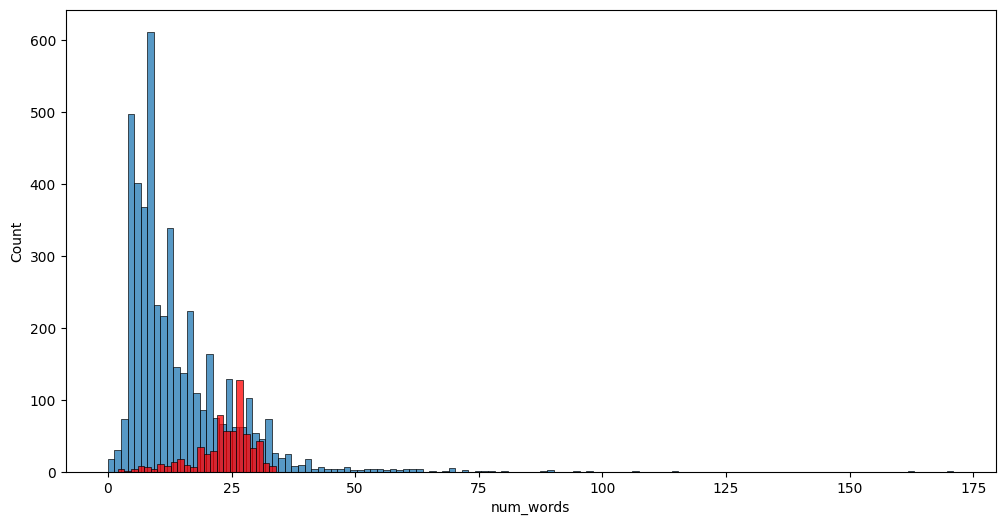

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

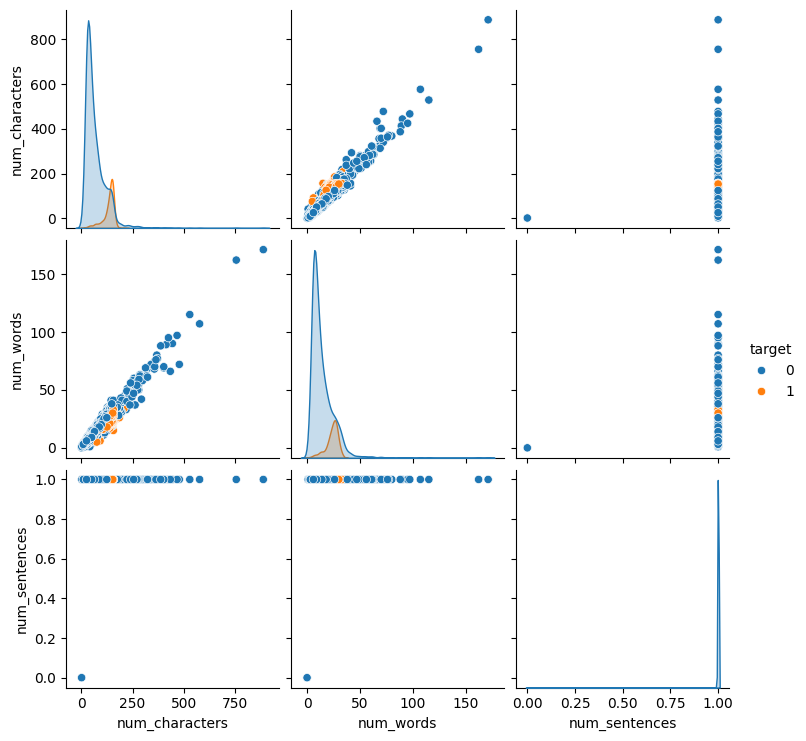

In [70]:
sns.pairplot(data,hue='target')

DATA PREPROCESSING


In [71]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)



In [73]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download the 'stopwords' dataset
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Now you can call transform_text without the error
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [75]:
data['sms'][10]

'Im gonna be home soon and i dont want to talk about this stuff anymore tonight k Ive cried enough today'

In [76]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [78]:
data['transformed_text'] = data['sms'].apply(transform_text)

In [79]:
data.head()

,output,sms,col3,col4,col5,target,num_characters,num_words,num_sentences,transformed_text
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0,102,20,1,go jurong point crazi avail bugi n great world...
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0,23,6,1,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0,43,11,1,u dun say earli hor u c alreadi say
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0,59,13,1,nah dont think goe usf live around though


In [80]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [82]:
# Replace 'df' with 'data' to access the correct DataFrame
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

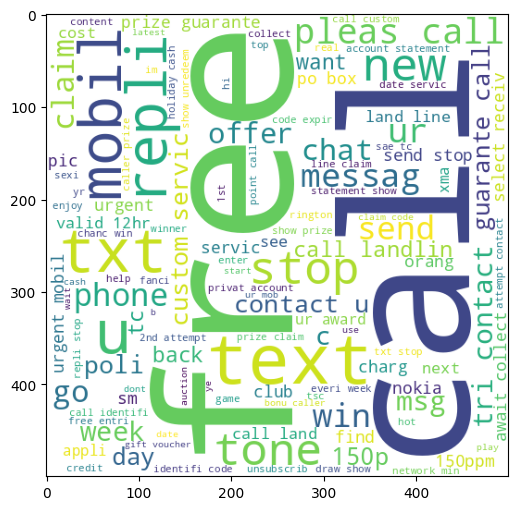

In [83]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [86]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

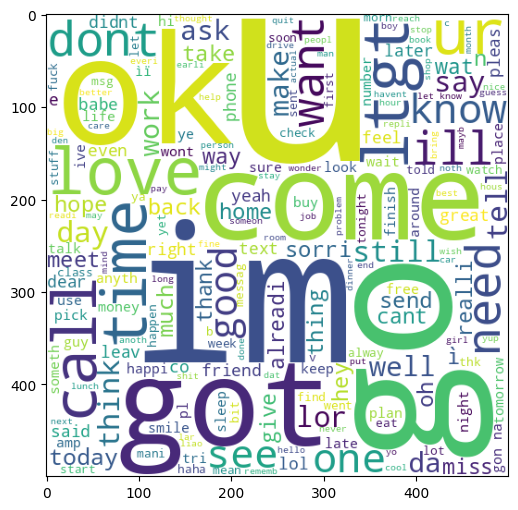

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [88]:
data.head()

,output,sms,col3,col4,col5,target,num_characters,num_words,num_sentences,transformed_text
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0,102,20,1,go jurong point crazi avail bugi n great world...
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0,23,6,1,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0,43,11,1,u dun say earli hor u c alreadi say
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0,59,13,1,nah dont think goe usf live around though


In [90]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist(): # Change df to data
    for word in msg.split():
        spam_corpus.append(word)

In [91]:
len(spam_corpus)

10359

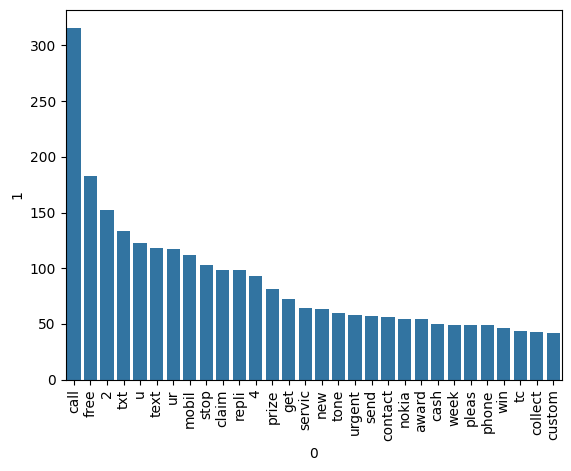

In [93]:
from collections import Counter

# Get the data for the bar plot
data_for_plot = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Create the bar plot using named arguments
sns.barplot(x=data_for_plot[0], y=data_for_plot[1])

plt.xticks(rotation='vertical')
plt.show()

In [96]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist(): # Change df to data
    for word in msg.split():
        ham_corpus.append(word)

In [97]:
len(ham_corpus)

36917

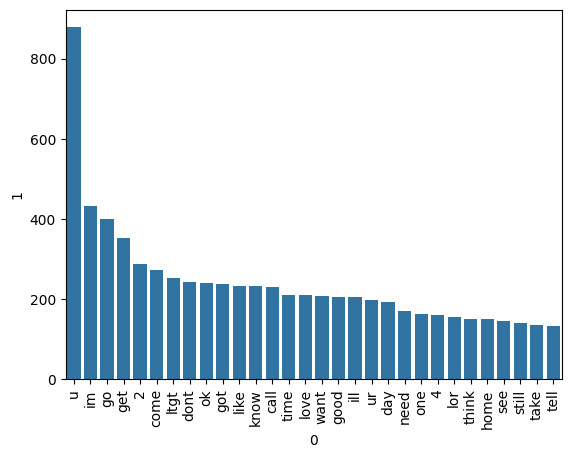

In [99]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Get the data for the bar plot
data_for_plot = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Create the bar plot using named arguments 'x' and 'y'
sns.barplot(x=data_for_plot[0], y=data_for_plot[1])

plt.xticks(rotation='vertical')
plt.show()

In [100]:
# Text Vectorization
# using Bag of Words
data.head()

,output,sms,col3,col4,col5,target,num_characters,num_words,num_sentences,transformed_text
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN,0,102,20,1,go jurong point crazi avail bugi n great world...
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN,0,23,6,1,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN,0,43,11,1,u dun say earli hor u c alreadi say
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN,0,59,13,1,nah dont think goe usf live around though


MODEL BUILDING

In [101]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [103]:
# Instead of:
# X = tfidf.fit_transform(df['transformed_text']).toarray()

# Use the correct DataFrame and column name:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [104]:
X.shape

(5144, 3000)

In [106]:
y = data['target'].values

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8532555879494655
[[773 121]
 [ 30 105]]
0.4646017699115044


In [112]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9727891156462585
[[892   2]
 [ 26 109]]
0.9819819819819819


In [113]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9795918367346939
[[893   1]
 [ 20 115]]
0.9913793103448276


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [116]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [117]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [118]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9659863945578231, 0.923728813559322)

In [119]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9659863945578231
Precision -  0.923728813559322
For  KN
Accuracy -  0.9047619047619048
Precision -  1.0
For  NB
Accuracy -  0.9727891156462585
Precision -  0.9819819819819819
For  DT
Accuracy -  0.9368318756073858
Precision -  0.8645833333333334
For  LR
Accuracy -  0.9504373177842566
Precision -  0.8962264150943396
For  RF
Accuracy -  0.9737609329446064
Precision -  1.0
For  AdaBoost
Accuracy -  0.9290573372206026
Precision -  0.8780487804878049
For  BgC
Accuracy -  0.9611273080660836
Precision -  0.905982905982906
For  ETC
Accuracy -  0.9737609329446064
Precision -  0.9821428571428571
For  GBDT
Accuracy -  0.9446064139941691
Precision -  0.9333333333333333
For  xgb
Accuracy -  0.9698736637512148
Precision -  0.9642857142857143


In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [122]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904762,1.000000
5,RF,0.973761,1.000000
8,ETC,0.973761,0.982143
2,NB,0.972789,0.981982
10,xgb,0.969874,0.964286
9,GBDT,0.944606,0.933333
0,SVC,0.965986,0.923729
7,BgC,0.961127,0.905983
4,LR,0.950437,0.896226
6,AdaBoost,0.929057,0.878049


In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [124]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904762
1,RF,Accuracy,0.973761
2,ETC,Accuracy,0.973761
3,NB,Accuracy,0.972789
4,xgb,Accuracy,0.969874
5,GBDT,Accuracy,0.944606
6,SVC,Accuracy,0.965986
7,BgC,Accuracy,0.961127
8,LR,Accuracy,0.950437
9,AdaBoost,Accuracy,0.929057


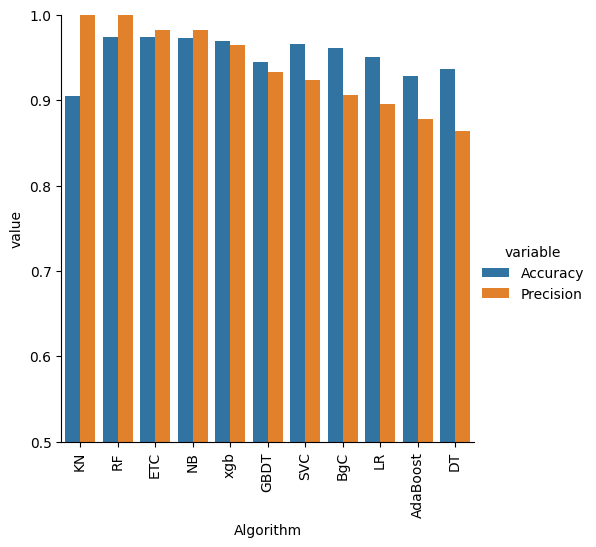

In [125]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [127]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [128]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [129]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [130]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [131]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904762,1.000000,0.904762,1.000000,0.904762,1.000000,0.904762,1.000000
1,RF,0.973761,1.000000,0.973761,1.000000,0.973761,1.000000,0.973761,1.000000
2,ETC,0.973761,0.982143,0.973761,0.982143,0.973761,0.982143,0.973761,0.982143
3,NB,0.972789,0.981982,0.972789,0.981982,0.972789,0.981982,0.972789,0.981982
4,xgb,0.969874,0.964286,0.969874,0.964286,0.969874,0.964286,0.969874,0.964286
5,GBDT,0.944606,0.933333,0.944606,0.933333,0.944606,0.933333,0.944606,0.933333
6,SVC,0.965986,0.923729,0.965986,0.923729,0.965986,0.923729,0.965986,0.923729
7,BgC,0.961127,0.905983,0.961127,0.905983,0.961127,0.905983,0.961127,0.905983
8,LR,0.950437,0.896226,0.950437,0.896226,0.950437,0.896226,0.950437,0.896226
9,AdaBoost,0.929057,0.878049,0.929057,0.878049,0.929057,0.878049,0.929057,0.878049


In [132]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [134]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [135]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [136]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9786200194363459
Precision 0.9747899159663865


In [137]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [138]:
from sklearn.ensemble import StackingClassifier

In [139]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [141]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9757045675413022
Precision 0.9365079365079365
